In [105]:
from ultralytics import YOLO 
import pickle
import torch
from collections import defaultdict
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:

model = YOLO('yolov8x')

In [ ]:
result = model.predict('input_videos/short.mov', save=True)

In [2]:
# with open('data.pkl', 'wb') as file:
#     pickle.dump(result, file)

In [ ]:
# with open('data.pkl', 'rb') as file:
#     result = pickle.load(file)

In [109]:
# result = model.track('input_videos/input_video.mp4',conf=0.2, save=True)
count = 0
rows = []
for i, frame in enumerate(result):
    row = defaultdict()
    if 32 in frame.boxes.cls:
        index = int(torch.where(frame.boxes.cls == 32)[0][0])
        row['frame index'] = i
        row['x'] = frame.boxes[index].xyxy[0].tolist()[0]
        row['y'] = frame.boxes[index].xyxy[0].tolist()[1]
        row['conf'] = float(frame.boxes[index].conf.item())
        count += 1
        rows.append(row)
df = pd.DataFrame(rows)
df

,frame index,x,y,conf
0,2,1090.214600,643.285645,0.563205
1,3,1090.060913,642.685791,0.574132
2,4,1090.056519,642.790649,0.439050
3,5,1089.298828,643.760742,0.515658
4,6,1088.384521,645.753906,0.483856
5,7,1085.285889,646.474915,0.482800
6,15,1068.508301,683.667664,0.320327
7,23,1006.119507,677.364502,0.338997
8,24,980.489502,653.641724,0.668810
9,25,957.024353,628.807007,0.692597


32: 'sports ball'

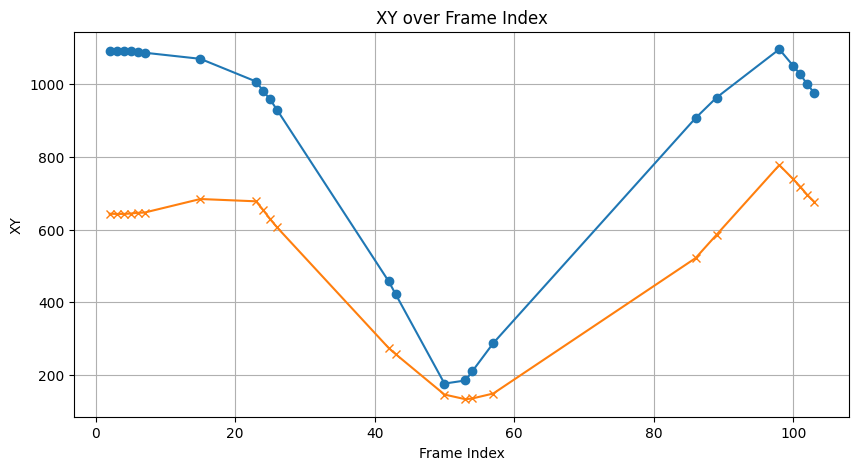

In [110]:
# Plotting
plt.figure(figsize=(10, 5))  # Set the figure size as needed
plt.plot(df['frame index'], df['x'], marker='o')  # Plot xy against frame_index
plt.plot(df['frame index'], df['y'], marker='x')  # Plot xy against frame_index

plt.title('XY over Frame Index')  # Title of the plot
plt.xlabel('Frame Index')  # Label for the x-axis
plt.ylabel('XY')  # Label for the y-axis
plt.grid(True)  # Optional: Adds a grid for better readability
plt.show()

# Inference

In [ ]:
from ultralytics import YOLO 

# model = YOLO('../yolov8x')
model = YOLO('../models/best.pt')


In [ ]:
result = model.predict('../input_videos/backyard.png', save=True, conf=0.2)

and this did not do great. Let's try a different model:

In [ ]:
from roboflow import Roboflow
import supervision as sv
import cv2


In [ ]:
project = rf.workspace().project("tennis-uc2es")
model = project.version(1).model


loading Roboflow workspace...
loading Roboflow project...


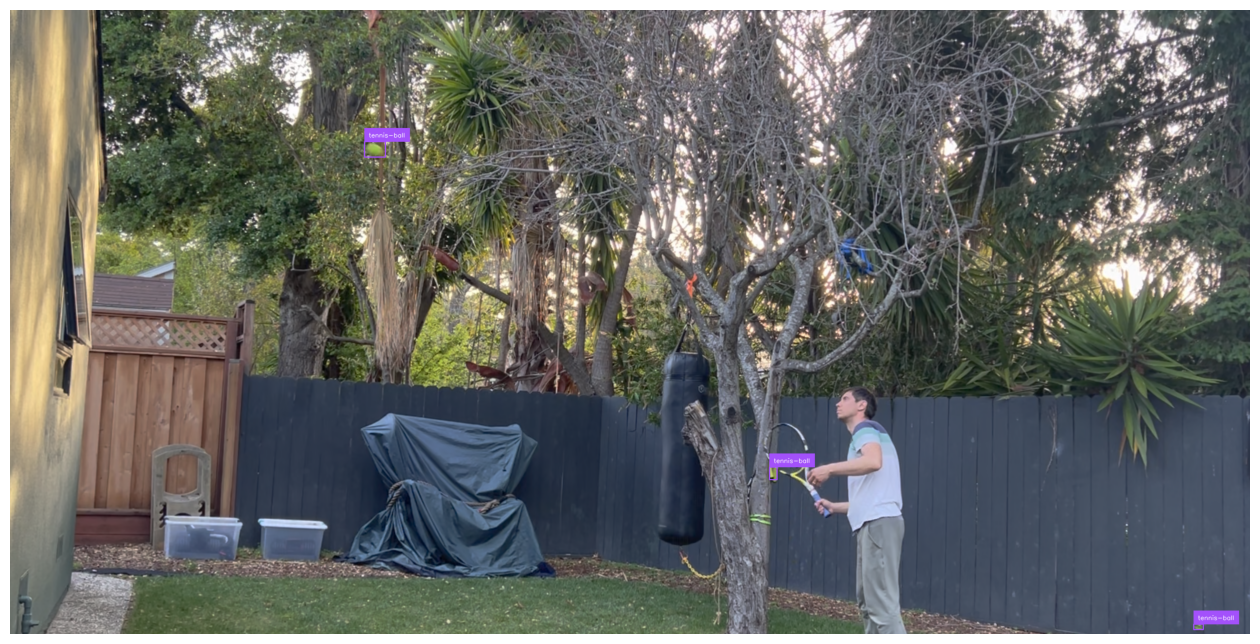

In [ ]:

result = model.predict("../input_videos/backyard2.png", confidence=40, overlap=30).json()

labels = [item["class"] for item in result["predictions"]]

detections = sv.Detections.from_inference(result)

label_annotator = sv.LabelAnnotator()
bounding_box_annotator = sv.BoundingBoxAnnotator()

image = cv2.imread("../input_videos/backyard2.png")

annotated_image = bounding_box_annotator.annotate(
    scene=image, detections=detections)
annotated_image = label_annotator.annotate(
    scene=annotated_image, detections=detections, labels=labels)

sv.plot_image(image=annotated_image, size=(16, 16))